<a href="https://colab.research.google.com/github/Um333r/PCA-Wine/blob/master/PCA_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA Assignment**


**Data Set :** Wine

1. Import Necessary libraries

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

2. Import Data


In [3]:
liquor = pd.read_csv('/content/wine.csv')
liquor

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


3. Data Understanding


In [4]:
liquor.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
liquor.shape


(178, 14)

In [6]:
liquor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
liquor.isna().sum()



Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
liquor.describe()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
liquor.dtypes



Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

4. Performing PCA
STEP 1 = Perform Scaling on the Data :
For Scaling = 1. First import StandardScalar , 2. Separate the features from the target , 3. Scale the features

In [10]:
from sklearn.preprocessing import scale


In [11]:
data = liquor.iloc[:, 1:]


In [12]:
# Converting into numpy array
liquor_array = data.values
liquor_array

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Normalizing data


In [13]:
# Normalizing data
liquor_norm = scale(liquor_array)
liquor_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [14]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [15]:
PCA = PCA()


In [16]:
pca_liquor = PCA.fit_transform(liquor_norm)
pca_liquor

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

STEP 2 = Explaining the Variance Using Principal Component :

In [17]:
# The amount of variance that each PCA explains is 
liquor_var = PCA.explained_variance_ratio_
liquor_var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [18]:
# Cumulative variance 
liquor_cum_var = np.cumsum(np.round(PCA.explained_variance_ratio_, decimals = 4)*100)
liquor_cum_var

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

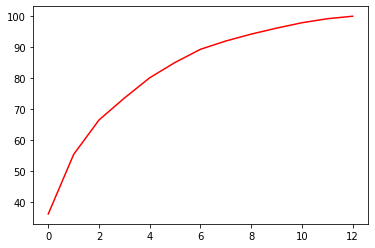

In [19]:
# Variance plot for PCA components obtained 
plt.plot(liquor_cum_var, color = "red")
plt.show()

STEP 3 = Combine the Target and the Principal Components :

In [20]:
#create data frame from pca1 and pca2

df_liquor = pd.concat([pd.DataFrame(pca_liquor[:, 0:3], columns = ['PC1','PC2','PC3']), liquor[['Type']]], axis = 1)
df_liquor

,PC1,PC2,PC3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [21]:
df_liquor['Type'].value_counts()


2    71
1    59
3    48
Name: Type, dtype: int64

STEP 4 = Plot the Principal Components on 2D :

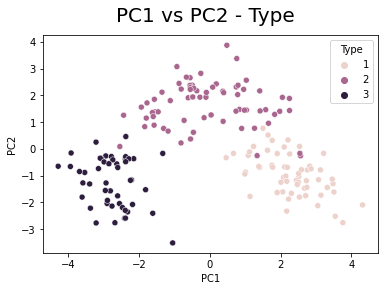

In [22]:
plt.suptitle('PC1 vs PC2 - Type', size = 20)

sns.scatterplot(data = df_liquor, x = 'PC1', y = 'PC2', hue = 'Type')
plt.show()

5. Clustering


Clustering a Data Frame with PC1, PC2 and PC3

(a) Hierarchical Clustering

STEP 1 = Data Pre-processing :

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [24]:
liquor = pd.read_csv('wine.csv')
liquor.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
liquor_x_1 = pd.DataFrame(pca_liquor[:, 0:3], columns = ['PC1','PC2', 'PC3'])
liquor_x_1

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


STEP 2 = Finding the optimal number of clusters using the Dendrogram :

In [26]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch

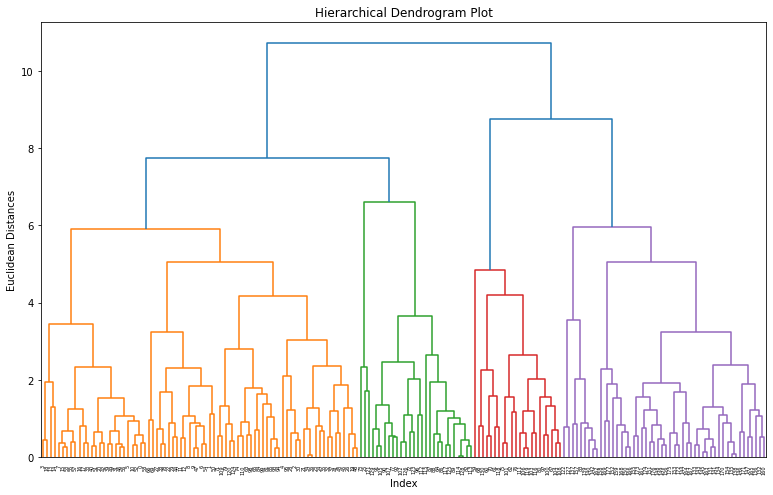

In [27]:
# create dendrogram
x = linkage(liquor_x_1, method = 'complete',metric = 'euclidean')

plt.figure(figsize = (13, 8))
plt.title('Hierarchical Dendrogram Plot')
plt.xlabel('Index')
plt.ylabel('Euclidean Distances')

sch.dendrogram(x)
plt.show()

STEP 3 = Training the hierarchical clustering model :

In [28]:
from sklearn.cluster import AgglomerativeClustering 


In [29]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=3)

In [30]:
x_hc = hc.fit_predict(liquor_x_1)
x_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [31]:
add_Clusters = pd.DataFrame(x_hc, columns = ['Clusters_1'])
add_Clusters.head()

,Clusters_1
0,2
1,2
2,2
3,2
4,2


In [32]:

liquor_x_1['Clusters_1'] = add_Clusters
liquor_x_1

,PC1,PC2,PC3,Clusters_1
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


STEP 4 = Clusters with Number of Records :

In [33]:
liquor_x_1['Clusters_1'].value_counts()


0    66
2    65
1    47
Name: Clusters_1, dtype: int64

STEP 5 = Plot the Principal Components of Hierarchical in 2D :

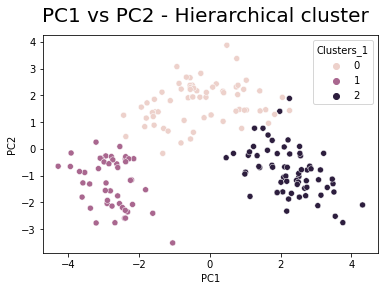

In [34]:
plt.suptitle('PC1 vs PC2 - Hierarchical cluster', size = 20)

sns.scatterplot(data = liquor_x_1, x = 'PC1', y = 'PC2', hue = 'Clusters_1')
plt.show()

(b) K-MEANS

STEP 1 = Data Pre-processing :

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
liquor = pd.read_csv('wine.csv')
liquor.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
liquor_x_1 = pd.DataFrame(pca_liquor[:, 0:3], columns = ['PC1','PC2', 'PC3'])
liquor_x_1

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


STEP 2 = Finding the optimal number of clusters using the Elbow Method :

In [38]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(liquor_x_1)
    wcss.append(kmeans.inertia_)
wcss

[1539.5034801883048,
 886.1611364823482,
 512.9995067661507,
 429.8030732473643,
 371.0239444945666,
 326.2768904959655,
 291.52701349085896,
 261.68437598859634,
 239.04461949060294,
 213.23994073321137]

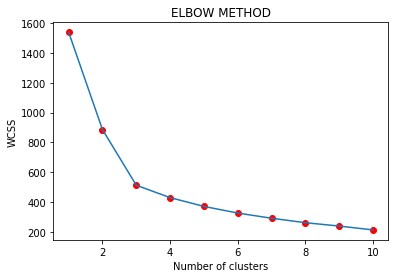

In [40]:
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss,color = 'red')
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

STEP 3 = Training the K - means clustering model :

In [41]:
km = KMeans(3, random_state = 42)
km.fit(liquor_x_1)

KMeans(n_clusters=3, random_state=42)

In [42]:
km.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [43]:
liquor_x_1 = liquor_x_1.copy()
liquor_x_1['Clusters_2'] = km.labels_
liquor_x_1

,PC1,PC2,PC3,Clusters_2
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


STEP 4 = Clusters with Number of Records :

In [44]:
liquor_x_1['Clusters_2'].value_counts()



2    65
1    62
0    51
Name: Clusters_2, dtype: int64

STEP 5 = Plot the Principal Components of KMEANS in 2D :¶

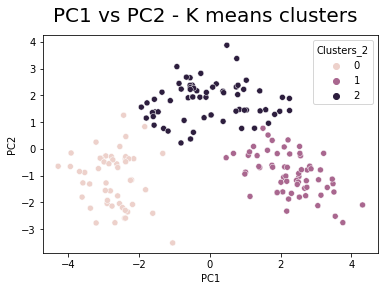

In [45]:
plt.suptitle('PC1 vs PC2 - K means clusters', size = 20)

sns.scatterplot(data = liquor_x_1, x = 'PC1', y = 'PC2', hue = 'Clusters_2')
plt.show()